In [25]:
import plotly.express as px
from ipywidgets import interact
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/lordflaron/ARE106data/master/lawsch85.csv")

In [8]:
df

,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60
0,0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,0,0,0,4.666667,0,0,0,0
1,1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,1,0,0,4.318182,0,0,0,0
2,2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,0,1,0,3.461539,0,0,1,0
3,3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,0,1,0,2.036765,0,0,0,1
4,4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,0,0,1,2.678571,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,17,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,0,0,1,0,3.560000,0,1,0,0
152,152,21,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,1,0,0,0,6.063830,0,1,0,0
153,153,143,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,0,0,0,1,4.647059,0,0,0,0
154,154,3,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,0,0,1,0,1.010000,1,0,0,0


## The Basics

The standard way to do plotting in python is by using `matplotlib`. This involves creating a figure and axis instance, and then plotting on that axis.

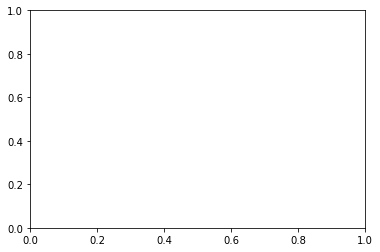

In [26]:
fig, ax = plt.subplots()

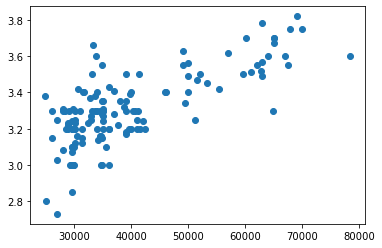

In [30]:
fig, ax = plt.subplots()
ax.scatter(df['salary'], df['GPA'])

<AxesSubplot:xlabel='salary', ylabel='GPA'>

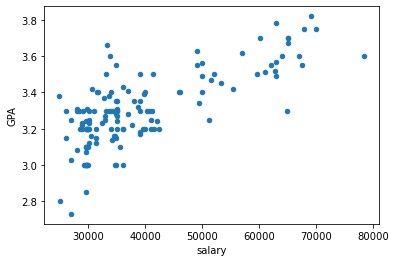

In [31]:
df.plot.scatter('salary', 'GPA')

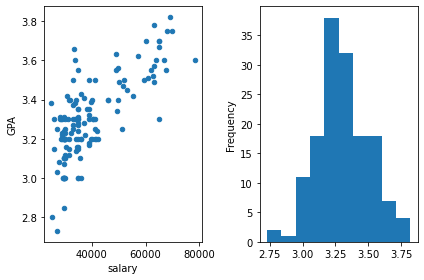

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2)

df.plot.scatter('salary', 'GPA', ax=ax1)
df['GPA'].plot.hist( ax=ax2)

plt.tight_layout()

## Using `plotly`

In [10]:
px.scatter(df, 'salary', 'GPA')

In [11]:
px.scatter(df, 'salary', 'GPA', color='LSAT')

In [12]:
px.scatter(df, 'salary', 'GPA', color='LSAT', size='rank')

In [15]:
px.scatter(df, 'salary', 'GPA', color='LSAT', size='rank', trendline='ols')

In [23]:
px.histogram(df, 'salary')

In [24]:

df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

## Interactivity

What if you wanted to play around with data as you were working?

In [43]:
@interact(region = ['north', 'south', 'east', 'west'])
def region_lookup(region):
    
    return df.query(f"{region} == 1").plot.scatter('salary', 'GPA', title=region)

interactive(children=(Dropdown(description='region', options=('north', 'south', 'east', 'west'), value='north'…